In [66]:
#http://www.football-data.co.uk/englandm.php
#https://www.football-data.co.uk/notes.txt
#cambiar fecha en excel aplicando Texto
import pandas as pd
import numpy as np
import matplotlib as plt
from __future__ import division

<h1>limpieza</h1>
<br>
<li>Como se puede observar mis datos no poseen missing sin embargo habra que acomodarlos para predecir si un equipo ganara o no.</li>
<li>que siginifica cada columna se encuentra en la siguiente liga https://www.football-data.co.uk/notes.txt</li>


In [124]:
df=pd.read_csv('C:/Users/omarp/Downloads/premier_2018.csv')
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,...,6,4,11,8,2,5,2,1,0,0
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,4,1,11,9,7,4,1,1,0,0
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,6,9,9,11,5,5,1,2,0,0
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,1,4,9,8,2,5,2,1,0,0
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,2,5,11,12,3,5,2,2,0,0


<h6>Renombro e elimino algunas columnas que no son necesarias segun mi criterio</h6>

In [125]:
df.drop(['Div','Referee'],axis=1,inplace=True)

In [126]:
df.columns=["Fecha","Local", "Visitante", "Goles_L","Goles_V","Resultado","Goles_Mitad_L","Goles_Mitad_V",
                   "Resultado_Mitad","Tiros_L","Tiros_V","Tiros_Buenos_L","Tiros_Buenos_V","Faltas_L","Faltas_V",
                  "Corners_L","Corners_V","Amarillas_L","Amarillas_V","Rojas_L","Rojas_V"]
df[['Resultado','Resultado_Mitad']]=df[['Resultado','Resultado_Mitad']].replace({"A": 'V', "D": 'E',"H":'L'})

In [127]:
df.drop(['Goles_Mitad_L','Goles_Mitad_V','Resultado_Mitad'],axis=1,inplace=True)

<h6> la columna con terminacion _V reprensenta la estadistica que pertenece al equipo visitante y el _L al  local</h6>

In [128]:
df.head()

,Fecha,Local,Visitante,Goles_L,Goles_V,Resultado,Tiros_L,Tiros_V,Tiros_Buenos_L,Tiros_Buenos_V,Faltas_L,Faltas_V,Corners_L,Corners_V,Amarillas_L,Amarillas_V,Rojas_L,Rojas_V
0,10/08/2018,Man United,Leicester,2,1,L,8,13,6,4,11,8,2,5,2,1,0,0
1,11/08/2018,Bournemouth,Cardiff,2,0,L,12,10,4,1,11,9,7,4,1,1,0,0
2,11/08/2018,Fulham,Crystal Palace,0,2,V,15,10,6,9,9,11,5,5,1,2,0,0
3,11/08/2018,Huddersfield,Chelsea,0,3,V,6,13,1,4,9,8,2,5,2,1,0,0
4,11/08/2018,Newcastle,Tottenham,1,2,V,15,15,2,5,11,12,3,5,2,2,0,0


In [129]:
df.describe()

,Goles_L,Goles_V,Tiros_L,Tiros_V,Tiros_Buenos_L,Tiros_Buenos_V,Faltas_L,Faltas_V,Corners_L,Corners_V,Amarillas_L,Amarillas_V,Rojas_L,Rojas_V
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.568421,1.252632,14.134211,11.144737,4.778947,3.928947,10.152632,10.305263,5.705263,4.552632,1.526316,1.684211,0.047368,0.076316
std,1.312836,1.180031,5.855371,4.654002,2.677686,2.283982,3.293532,3.503707,2.971718,2.730627,1.222844,1.209140,0.212706,0.275599
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,8.000000,4.000000,2.750000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,14.000000,11.000000,5.000000,4.000000,10.000000,10.000000,5.000000,4.000000,1.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,18.000000,14.000000,6.000000,5.250000,12.000000,13.000000,8.000000,6.000000,2.000000,2.000000,0.000000,0.000000
max,6.000000,6.000000,36.000000,25.000000,14.000000,12.000000,23.000000,21.000000,16.000000,14.000000,6.000000,5.000000,1.000000,2.000000


<h6>separo el dataframe en dos tipos de estadisticas para equipos locales y equipos visitantes</h6>

In [130]:
#caso locales
variables=['Local','Visitante','Fecha']+[i for i in df.columns if i.endswith('_L')]+[x for x in df.columns if x.endswith('_V')]+['Resultado']
df_final=pd.DataFrame()
df_final=df[variables].copy()
df_final.columns=['Equipo','Rival','Fecha','Goles_0','Tiros_0','Tiros_Acertados_0','Faltas_0','Corners_0','Amarillas_0','Rojas_0',
                 'Goles_1','Tiros_1','Tiros_Acertados_1','Faltas_1','Corners_1','Amarillas_1','Rojas_1',
                 'Resultado']
df_final['Posicion']='L'
#caso visitantes
variables=['Visitante','Local','Fecha']+[i for i in df.columns if i.endswith('_V')]+[x for x in df.columns if x.endswith('_L')]+['Resultado']
df_final_2=pd.DataFrame()
df_final_2=df[variables].copy()
df_final_2.columns=['Equipo','Rival','Fecha','Goles_0','Tiros_0','Tiros_Acertados_0','Faltas_0','Corners_0','Amarillas_0','Rojas_0',
                 'Goles_1','Tiros_1','Tiros_Acertados_1','Faltas_1','Corners_1','Amarillas_1','Rojas_1',
                 'Resultado']
df_final_2['Posicion']='V'
df_final_2.head()

df_prueba=df_final.append(df_final_2)

#asigno 1 si gano y 0 si perdio el equipo
y=[]
for i in range(0,len(df_prueba.Resultado)):
    if df_prueba['Resultado'].iloc[i]=='E':
        y.append(0)
    if df_prueba['Resultado'].iloc[i]==df_prueba['Posicion'].iloc[i]:
        y.append(1)
    elif df_prueba['Resultado'].iloc[i]!='E':
        y.append(-1)
df_prueba['y']=y
df_prueba['Fecha'] = pd.to_datetime(df_prueba['Fecha'],dayfirst = True)
y=[]
for i in df_prueba['y']:
    if i==1:
        y.append(1)
    else:
        y.append(0)
df_prueba['y']=y
df_prueba.sort_values(['Equipo', 'Fecha'],inplace=True)
partido=[]
for i in range(1,21):
    for j in range(1,39):
        partido.append(j)
df_prueba['No_partido']=partido

<h6>las columnas con terminacion _0 significan las estadisticas del equipo y las _1 las estadisticas del equipo rival</h6>

In [131]:
df_prueba.head()

,Equipo,Rival,Fecha,Goles_0,Tiros_0,Tiros_Acertados_0,Faltas_0,Corners_0,Amarillas_0,Rojas_0,...,Tiros_1,Tiros_Acertados_1,Faltas_1,Corners_1,Amarillas_1,Rojas_1,Resultado,Posicion,y,No_partido
7,Arsenal,Man City,2018-08-12,0,9,3,11,2,2,0,...,17,8,14,9,2,0,V,L,0,1
11,Arsenal,Chelsea,2018-08-18,2,15,6,9,1,2,0,...,24,11,12,5,0,0,L,V,0,2
20,Arsenal,West Ham,2018-08-25,3,17,10,16,10,1,0,...,13,5,13,2,3,0,L,L,1,3
38,Arsenal,Cardiff,2018-09-02,3,17,11,14,9,4,0,...,14,3,12,3,3,0,V,V,1,4
44,Arsenal,Newcastle,2018-09-15,2,12,2,11,4,0,0,...,4,2,13,10,0,0,V,V,1,5


<h6>Para esta parte lo que tome fue las estadisticas de los ultimo 4 partidos del equipo, el rival que enfrentarian y si jugaba de local o visitante, despues la agrupe por promedio mejor ya que hice varios modelos pero no consigui llegar a nada, las columnas que inician con J_# significan esadisticas de las jornada # pasada</h6>

In [132]:
df=df_prueba[0:38]
aux=df[0:5].copy()
aux.reset_index(inplace=True)
aux.drop(['index'],inplace=True,axis=1)
lista=[x for x in aux.columns if x.endswith("_0") or x.endswith("_1")]
columnas=[]
for j in range(1,5):
    for i in lista:
        columnas.append('j'+str(j)+'_'+i)
columnas=columnas+['No_partido','Equipo','Rival','Posicion','y']
valores=[]
for j in range(0,4):
    for i in aux[lista].iloc[j]:
        valores.append(i)
valores.append(aux[['No_partido','Equipo','Rival','Posicion','y']].iloc[4]['No_partido'])        
valores.append(aux[['Equipo','Rival','Posicion','y']].iloc[4]['Equipo'])
valores.append(aux[['Equipo','Rival','Posicion','y']].iloc[4]['Rival'])
valores.append(aux[['Equipo','Rival','Posicion','y']].iloc[4]['Posicion'])
valores.append(aux[['Equipo','Rival','Posicion','y']].iloc[4]['y'])
df_final=pd.DataFrame([valores],columns=columnas) 
for i in range(1,34):
    aux=df[i:i+5].copy()
    aux.reset_index(inplace=True)
    aux.drop(['index'],inplace=True,axis=1)
    columnas=[]
    for j in range(1,5):
         for i in lista:
            columnas.append('j'+str(j)+'_'+i)
    columnas=columnas+['No_partido','Equipo','Rival','Posicion','y']
    valores=[]
    for j in range(0,4):
        for i in aux[lista].iloc[j]:
            valores.append(i)
    valores.append(aux[['No_partido','Equipo','Rival','Posicion','y']].iloc[4]['No_partido'])  
    valores.append(aux[['Equipo','Rival','Posicion','y']].iloc[4]['Equipo'])
    valores.append(aux[['Equipo','Rival','Posicion','y']].iloc[4]['Rival'])
    valores.append(aux[['Equipo','Rival','Posicion','y']].iloc[4]['Posicion'])
    valores.append(aux[['Equipo','Rival','Posicion','y']].iloc[4]['y'])
    df_final_aux=pd.DataFrame([valores],columns=columnas) 
    df_final=df_final.append(df_final_aux)
df_x=df_final
indices=[]
for h in range(1,20):
    df=df_prueba[h*38:(h+1)*38]
    aux=df[0:5].copy()
    aux.reset_index(inplace=True)
    aux.drop(['index'],inplace=True,axis=1)
    lista=[x for x in aux.columns if x.endswith("_0") or x.endswith("_1")]
    columnas=[]
    for j in range(1,5):
        for i in lista:
            columnas.append('j'+str(j)+'_'+i)
    columnas=columnas+['No_partido','Equipo','Rival','Posicion','y']
    valores=[]
    for j in range(0,4):
        for i in aux[lista].iloc[j]:
            valores.append(i)
    valores.append(aux[['No_partido','Equipo','Rival','Posicion','y']].iloc[4]['No_partido'])         
    valores.append(aux[['Equipo','Rival','Posicion','y']].iloc[4]['Equipo'])
    valores.append(aux[['Equipo','Rival','Posicion','y']].iloc[4]['Rival'])
    valores.append(aux[['Equipo','Rival','Posicion','y']].iloc[4]['Posicion'])
    valores.append(aux[['Equipo','Rival','Posicion','y']].iloc[4]['y'])
    df_final=pd.DataFrame([valores],columns=columnas)
    for i in range(1,34):
        aux=df[i:i+5].copy()
        aux.reset_index(inplace=True)
        aux.drop(['index'],inplace=True,axis=1)
        columnas=[]
        for j in range(1,5):
            for i in lista:
                columnas.append('j'+str(j)+'_'+i)
        columnas=columnas+['No_partido','Equipo','Rival','Posicion','y']
        valores=[]
        for j in range(0,4):
            for i in aux[lista].iloc[j]:
                valores.append(i)
        valores.append(aux[['No_partido','Equipo','Rival','Posicion','y']].iloc[4]['No_partido']) 
        valores.append(aux[['Equipo','Rival','Posicion','y']].iloc[4]['Equipo'])
        valores.append(aux[['Equipo','Rival','Posicion','y']].iloc[4]['Rival'])
        valores.append(aux[['Equipo','Rival','Posicion','y']].iloc[4]['Posicion'])
        valores.append(aux[['Equipo','Rival','Posicion','y']].iloc[4]['y'])
        df_final_aux=pd.DataFrame([valores],columns=columnas) 
        df_final=df_final.append(df_final_aux)
    df_x=df_x.append(df_final)

<h6>ya que probe varios modelos y eran demasiadas variables decidi agrupar las por promedio y agregar otras 6 variables que resultaron muy buenas para predecir<h6>
<li>Numero de victorias en las 4 jornadas pasadas del quipo y rival</li>
<li>Numero de empates en las 4 jornadas pasadas del quipo y rival</li>
<li>Numero de derrotas en las 4 jornadas pasadas del quipo y rival</li>

In [133]:
aux=[x for x in df_x.columns if x.endswith('Goles_0')]
promedio_goles_0=df_x[aux].mean(axis=1)
aux=[x for x in df_x.columns if x.endswith('Tiros_0')]
promedio_tiros_0=df_x[aux].mean(axis=1)
aux=[x for x in df_x.columns if x.endswith('Tiros_Acertados_0')]
promedio_tiros_acertados_0=df_x[aux].mean(axis=1)

aux=[x for x in df_x.columns if x.endswith('Goles_1')]
promedio_goles_1=df_x[aux].mean(axis=1)
aux=[x for x in df_x.columns if x.endswith('Tiros_1')]
promedio_tiros_1=df_x[aux].mean(axis=1)
aux=[x for x in df_x.columns if x.endswith('Tiros_Acertados_1')]
promedio_tiros_acertados_1=df_x[aux].mean(axis=1)

df=df_x

victorias=[]
for i in range(0,len(df)):
    aux=0
    if df['j1_Goles_0'].iloc[i]-df['j1_Goles_1'].iloc[i]>0:
        aux=aux+1
    if df['j2_Goles_0'].iloc[i]-df['j2_Goles_1'].iloc[i]>0:
        aux=aux+1
    if df['j3_Goles_0'].iloc[i]-df['j3_Goles_1'].iloc[i]>0:
        aux=aux+1
    if df['j4_Goles_0'].iloc[i]-df['j4_Goles_1'].iloc[i]>0:
        aux=aux+1
    victorias.append(aux)

empates=[]
for i in range(0,len(df)):
    aux=0
    if df['j1_Goles_0'].iloc[i]-df['j1_Goles_1'].iloc[i]==0:
        aux=aux+1
    if df['j2_Goles_0'].iloc[i]-df['j2_Goles_1'].iloc[i]==0:
        aux=aux+1
    if df['j3_Goles_0'].iloc[i]-df['j3_Goles_1'].iloc[i]==0:
        aux=aux+1
    if df['j4_Goles_0'].iloc[i]-df['j4_Goles_1'].iloc[i]==0:
        aux=aux+1
    empates.append(aux)

derrotas=[]
for i in range(0,len(df)):
    aux=0
    if df['j1_Goles_0'].iloc[i]-df['j1_Goles_1'].iloc[i]<0:
        aux=aux+1
    if df['j2_Goles_0'].iloc[i]-df['j2_Goles_1'].iloc[i]<0:
        aux=aux+1
    if df['j3_Goles_0'].iloc[i]-df['j3_Goles_1'].iloc[i]<0:
        aux=aux+1
    if df['j4_Goles_0'].iloc[i]-df['j4_Goles_1'].iloc[i]<0:
        aux=aux+1
    derrotas.append(aux)
    
df=pd.DataFrame()
df['No_partido']=df_x['No_partido']
df[['Equipo','Rival','Posicion']]=df_x[['Equipo','Rival','Posicion']]
df['promedio_goles_0']=promedio_goles_0
df['promedio_tiros_0']=promedio_tiros_0
df['promedio_tiros_acertados_0']=promedio_tiros_acertados_0
df['promedio_goles_1']=promedio_goles_1
df['promedio_tiros_1']=promedio_tiros_1
df['promedio_tiros_acertados_1']=promedio_tiros_acertados_1
df['victorias']=victorias
df['empates']=empates
df['derrotas']=derrotas
df['y']=df_x['y']
df.reset_index(inplace=True)
df.drop('index',inplace=True,axis=1)

In [134]:
victorias_r=[]
empates_r=[]
derrotas_r=[]
for i in range(0,len(df)):
    fil1=df['No_partido']==df.iloc[i][0]
    fil2=df['Equipo']==df.iloc[i][2]    
    victorias_r.append(int(df.where(fil1 &fil2).dropna()['victorias']))
    empates_r.append(int(df.where(fil1 &fil2).dropna()['empates']))
    derrotas_r.append(int(df.where(fil1 &fil2).dropna()['derrotas']))
df['victorias_r']=victorias_r
df['empates_r']=empates_r
df['derrotas_r']=derrotas_r

In [135]:
df.head()

,No_partido,Equipo,Rival,Posicion,promedio_goles_0,promedio_tiros_0,promedio_tiros_acertados_0,promedio_goles_1,promedio_tiros_1,promedio_tiros_acertados_1,victorias,empates,derrotas,y,victorias_r,empates_r,derrotas_r
0,5,Arsenal,Newcastle,V,2.00,14.50,7.50,2.00,17.00,6.75,2,0,2,1,0,1,3
1,6,Arsenal,Everton,L,2.50,15.25,7.25,1.75,13.75,5.25,3,0,1,1,1,2,1
2,7,Arsenal,Watford,L,2.50,13.75,7.00,1.00,10.00,4.00,4,0,0,1,2,1,1
3,8,Arsenal,Fulham,V,2.25,11.75,5.00,0.75,10.00,3.75,4,0,0,1,0,2,2
4,9,Arsenal,Leicester,L,2.75,9.75,4.00,0.50,11.75,4.00,4,0,0,1,2,0,2


In [136]:
df.shape

(680, 17)

In [137]:
df.describe()

,No_partido,promedio_goles_0,promedio_tiros_0,promedio_tiros_acertados_0,promedio_goles_1,promedio_tiros_1,promedio_tiros_acertados_1,victorias,empates,derrotas,y,victorias_r,empates_r,derrotas_r
count,680.00000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000
mean,21.50000,1.402941,12.546324,4.300000,1.405147,12.551471,4.303309,1.639706,0.717647,1.642647,0.407353,1.639706,0.714706,1.645588
std,9.81793,0.700929,3.173706,1.456689,0.691050,3.444959,1.365202,1.133717,0.759610,1.095017,0.491703,1.131116,0.760448,1.094629
min,5.00000,0.000000,4.750000,1.000000,0.000000,2.250000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.00000,0.937500,10.500000,3.250000,0.750000,10.250000,3.250000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,21.50000,1.250000,12.250000,4.250000,1.250000,12.500000,4.250000,2.000000,1.000000,2.000000,0.000000,2.000000,1.000000,2.000000
75%,30.00000,1.750000,14.500000,5.250000,1.750000,14.750000,5.250000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000
max,38.00000,4.000000,25.500000,9.250000,3.750000,24.250000,8.500000,4.000000,3.000000,4.000000,1.000000,4.000000,3.000000,4.000000


<h6>aunque es claro que pose outliers creo los metere dentro del modelo</h6>

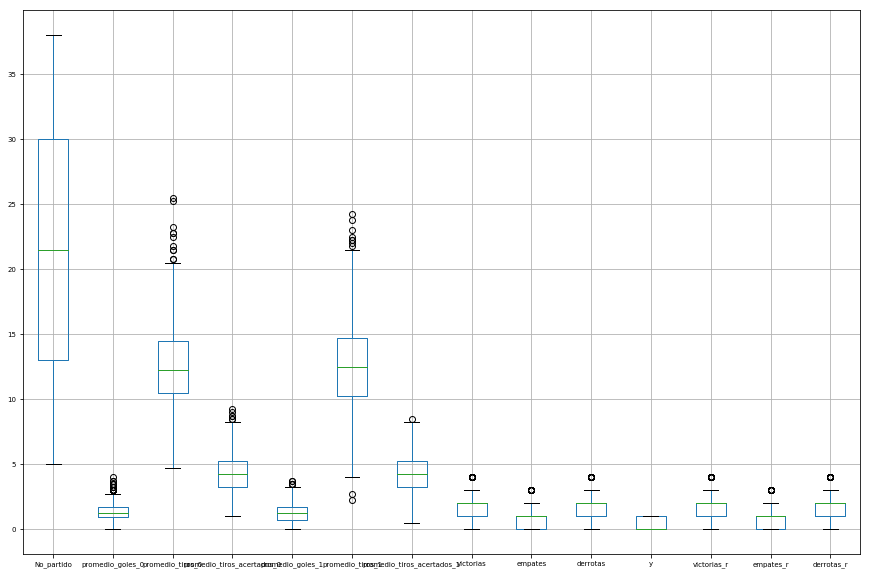

In [138]:
df.boxplot([x for x in df.describe().columns],fontsize=7,figsize=[15,10])


In [139]:
df.to_csv("limpieza_2018.csv")